<div style="float:right;"><ul><li><b>Name:</b>Yash Ketan Kanakia</li><li><b>Roll No: </b>E21027</li></ul></div>

# AIF Assignment 4

1. Test the created pipeline with S&P500 and Tesla datasets

2. Experiment with various regularization values for alpha

    1. What is the impact of increasing alpha?
    2. Note: default value for alpha is = 1

In [95]:
#Importing Packages

import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import yfinance as yf #For accessing stock price from Yahoo Finance
from sklearn.linear_model import Ridge, LinearRegression

In [70]:
#Reading Stock Price
stockPrice = pd.read_csv(r"C:\Users\Owner\Downloads\AIF\RawData\stock.csv")
stockPrice.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [71]:
#Sorting Values
stockPrice.sort_values(by='Date')

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [72]:
#Checking Null Values
stockPrice.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [73]:
#Obrtaining Info About the Data 
stockPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [75]:
#Reading Stock Volume Data
stockVol = pd.read_csv(r"C:\Users\Owner\Downloads\AIF\RawData\stock_volume.csv")
stockVol.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000


In [112]:
#Sorting Values
stockVol.sort_values(by='Date')
stockVol.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [113]:
#Obrtaining Info About the Data 
stockVol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 168.8+ KB


In [84]:
#function to view the plots

def ploty_plot(df,title):
    fig = px.line(title=title)
    for i in df.columns[1:]:
        fig.add_scatter(x=df['Date'], y=df[i],name = i)
    fig.show()

In [83]:
#Plot of raw stock price
ploty_plot(stockPrice,"Raw stock price")

In [85]:
#function to normalize stock prices on their initial values

def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

#normailze our stock data
idf_norm = normalize(idf)
idf_norm.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666


In [103]:
# function to concatenate a single stock price, volume.

def price_vol_stock(price, volume, stockname):
    stock_closeprice = str(stockname + "ClosePrice") 
    return pd.DataFrame( {'Date':price['Date'], stock_closeprice: price[stockname], 'Volume':volume[stockname]} )


In [102]:
# function to output the target variable.
# target for today is tomorrow's stock close price.

def price_vol_target_stock(df,stockname):
    stock_closeprice = str(stockname + "ClosePrice")
    df["target"] = df[[stock_closeprice]].shift(-1)
    return df


In [101]:
# function to pre-process ie create the combined dataframe of [stock price, volume, target] & do target,predictor separation
# stock price, stock volume dataframes along with stockname are inputs.
# X,y & combined dataframe(price,volume, target) are outputs.

def pre_process_Xy(df1,df2,stockname):
    
    df_price_vol = price_vol_stock(df1, df2, stockname)
    df_price_vol_target = price_vol_target_stock(df_price_vol,stockname)
    df_price_vol_target = df_price_vol_target[:-1]
    
    Stock_ClosePrice = str(stockname + "ClosePrice")
    X = df_price_vol_target[[Stock_ClosePrice, "Volume"]]
    y = df_price_vol_target[["target"]] 
    
    return (X,y,df_price_vol_target)
    

In [100]:
# function to test, train split in the ratio of 70,30
# predictors, target train,test split

def Xy_split(X,y):
    split = int(len(X)*0.7)

    X_train = X.iloc[0:split,]
    X_test = X.iloc[split:,]

    y_train = y.iloc[0:split,]
    y_test = y.iloc[split:,]
    
    return (X_train, y_train, X_test, y_test)

In [99]:
# function to show plots

def show_plot(df, title):
    plt.figure(figsize=(8,5))
    plt.plot(df)
    plt.title(title)
    plt.legend(["ClosePrice", "Volume"])
    plt.show()

In [98]:
# importing necessary libraries

from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler

In [105]:
# function to predict the next day stock price based on today stock price, volume.
# inputs: 
# stock price df, stock volume df, stockname, alpha
# outputs: 
# predictions on test data, dataframe with test predictions, plot of test predictions vs original test data.
# R^2 score on test data.

# Intermediate steps in this function:
# do preprocessing on input df, create X,y test, train splits, perform scaling, plots of train data

def predictions_stock(stock, stock_vol, stockname, alpha=1):
    
    # calling the preprocess function
    
    X,y,Stock_PriceVolTarget = pre_process_Xy(stock, stock_vol, stockname)
    
    print(stockname,'\n')
    print("X", X.shape,"y", y.shape)
    print('========================================')
    
    # calling the X,y test train split function
    
    X_train, y_train, X_test, y_test = Xy_split(X,y)

    print("X_train",X_train.shape, "X_test", X_test.shape)
    print("y_train", y_train.shape, "y_test", y_test.shape)
    
    # calling the plot function
    
    show_plot(X_train, "Train data")
    show_plot(X_train, "Test data")

    # scale only the predictors data for train, test data(X)

    scaling  =  MinMaxScaler()
    X_train_scaled = scaling.fit_transform(X_train)
    X_test_scaled = scaling.fit_transform(X_test)
    
    # display the plots of train, test data(X)
    
    show_plot(X_train_scaled, "Train data after scaling")
    show_plot(X_test_scaled, "Test data after scaling")
    
    # creating the pipeline for scaling of the predictors train data to fit on Ridge linear regression model with given alpha
    # default alpha is 1.0
    # target scaling done using the TransformedTargetregressor. 
    # model fitting done scaled X_train,y_train.
    
    pipeline = Pipeline([('scaling', scaling), ('model',Ridge(alpha= alpha))])
    model_R = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
    model_R.fit(X_train,y_train)
    
    # predict the R^2 score on test data
    
    model_R_score = model_R.score(X_test,y_test)
    
    # predictions on test data
    
    predictions = model_R.predict(X_test)
    
    # saving the predictions on test data in the dataframe df_predictions
    
    split = int(len(X)*0.7)

    df_predictions = Stock_PriceVolTarget.iloc[split:,].copy()
    df_predictions['predictions'] = predictions

    print("=======================================")
    print("df_predictions", df_predictions.shape)
    print("=======================================")
    print("R^2 score on test data:", model_R_score)
    print("=======================================")
    print(df_predictions.head(10))
    print("=======================================")
    print(df_predictions.tail(10))
    ploty_plot(df_predictions[["Date","target", "predictions"]], "Actual vs Predicted")

AAPL 

X (2158, 2) y (2158, 1)
X_train (1510, 2) X_test (648, 2)
y_train (1510, 1) y_test (648, 1)


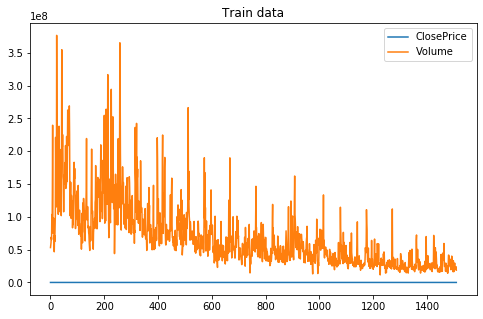

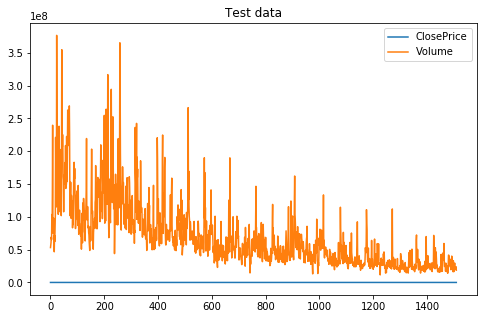

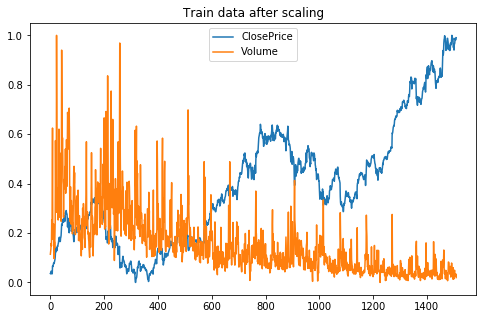

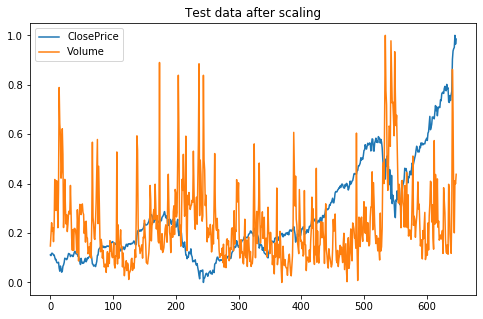

df_predictions (648, 5)
R^2 score on test data: 0.9907985490674454
            Date  AAPLClosePrice    Volume      target  predictions
1510  2018-01-12      177.089996  25418100  176.190002   176.192437
1511  2018-01-16      176.190002  29565900  179.100006   175.286057
1512  2018-01-17      179.100006  34386800  179.259995   178.124500
1513  2018-01-18      179.259995  31193400  178.460007   178.298045
1514  2018-01-19      178.460007  32425100  177.000000   177.504798
1515  2018-01-22      177.000000  27108600  177.039993   176.095351
1516  2018-01-23      177.039993  32689100  174.220001   176.106472
1517  2018-01-24      174.220001  51105100  171.110001   173.239060
1518  2018-01-25      171.110001  41529000  171.509995   170.227913
1519  2018-01-26      171.509995  39143000  167.960007   170.633490
            Date  AAPLClosePrice    Volume      target  predictions
2148  2020-07-28      373.010010  25906400  380.160004   368.933556
2149  2020-07-29      380.160004  22582300  384.7

In [106]:
# predictions for apple stock

stockname = "AAPL"

predictions_stock(stockPrice,stockVol,stockname,alpha=1)

### Question 1
#### Test the created pipeline with S&P500 and Tesla datasets


sp500 

X (2158, 2) y (2158, 1)
X_train (1510, 2) X_test (648, 2)
y_train (1510, 1) y_test (648, 1)


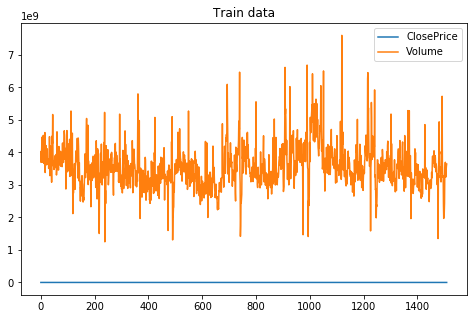

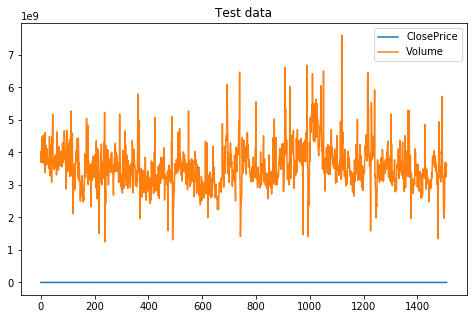

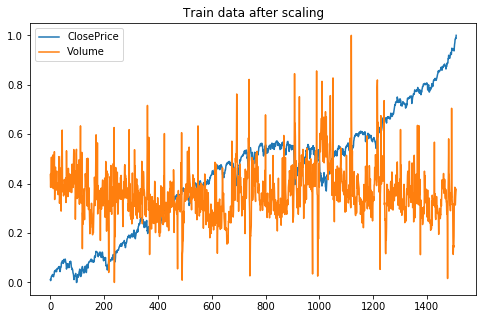

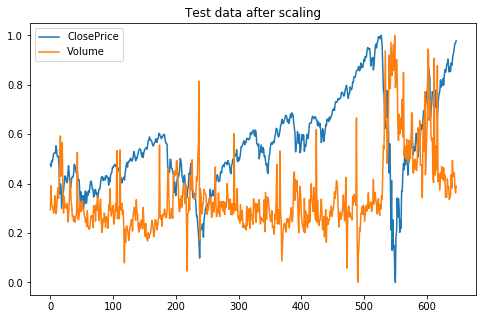

df_predictions (648, 5)
R^2 score on test data: 0.9572013321150187
            Date  sp500ClosePrice      Volume       target  predictions
1510  2018-01-12      2786.239990  3573970000  2776.419922  2777.385787
1511  2018-01-16      2776.419922  4325970000  2802.560059  2767.978388
1512  2018-01-17      2802.560059  3778050000  2798.030029  2793.598357
1513  2018-01-18      2798.030029  3681470000  2810.300049  2789.082281
1514  2018-01-19      2810.300049  3639430000  2832.969971  2801.193722
1515  2018-01-22      2832.969971  3471780000  2839.129883  2823.534863
1516  2018-01-23      2839.129883  3519650000  2837.540039  2829.642602
1517  2018-01-24      2837.540039  4014070000  2839.250000  2828.267813
1518  2018-01-25      2839.250000  3835150000  2872.870117  2829.886832
1519  2018-01-26      2872.870117  3443230000  2853.530029  2862.962359
            Date  sp500ClosePrice      Volume       target  predictions
2148  2020-07-28      3218.439941  4027890000  3258.439941  3204.7695

In [108]:
# predictions for "sp5oo" with alpha =1
stockname = "sp500"
predictions_stock(stockPrice,stockVol,stockname,alpha=1)

TSLA 

X (2158, 2) y (2158, 1)
X_train (1510, 2) X_test (648, 2)
y_train (1510, 1) y_test (648, 1)


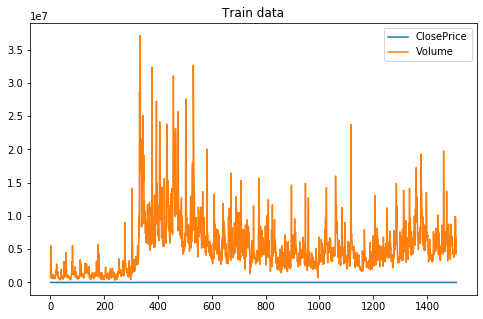

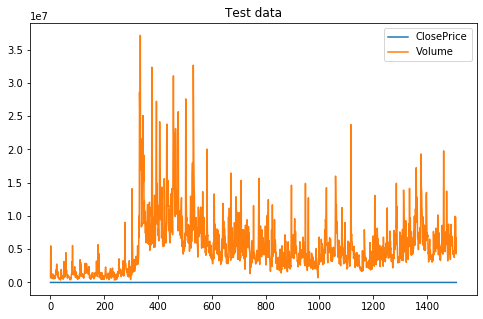

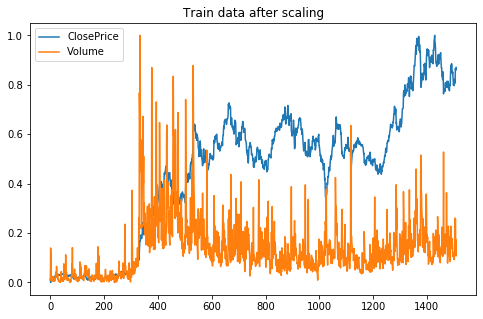

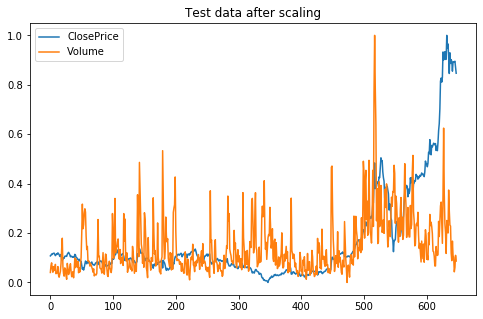

df_predictions (648, 5)
R^2 score on test data: 0.9923456362339212
            Date  TSLAClosePrice   Volume      target  predictions
1510  2018-01-12      336.220001  4825100  340.059998   334.616251
1511  2018-01-16      340.059998  6474300  347.160004   338.571730
1512  2018-01-17      347.160004  7103500  344.570007   345.649358
1513  2018-01-18      344.570007  5685800  350.019989   342.951708
1514  2018-01-19      350.019989  4888300  351.559998   348.259700
1515  2018-01-22      351.559998  6210400  352.790009   349.910423
1516  2018-01-23      352.790009  5465400  345.890015   351.053314
1517  2018-01-24      345.890015  5287500  337.640015   344.217329
1518  2018-01-25      337.640015  6740300  342.850006   336.206206
1519  2018-01-26      342.850006  4539400  349.529999   341.140241
            Date  TSLAClosePrice    Volume       target  predictions
2148  2020-07-28     1476.489990  15808700  1499.109985  1462.513237
2149  2020-07-29     1499.109985   9426900  1487.489990  1

In [109]:
# predictions for "TSLA" with alpha =1
stockname = "TSLA"
predictions_stock(stockPrice,stockVol,stockname,alpha=1)

### Question 2

Experiment with various regularization values for alpha

    1. What is the impact of increasing alpha?
    2. Note: default value for alpha is = 1

sp500 

X (2158, 2) y (2158, 1)
X_train (1510, 2) X_test (648, 2)
y_train (1510, 1) y_test (648, 1)


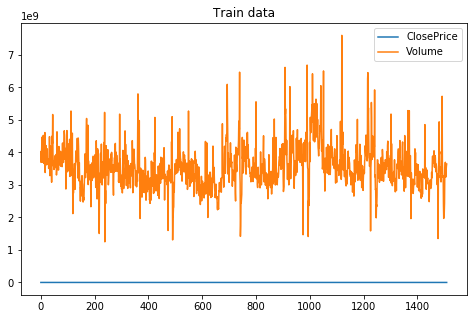

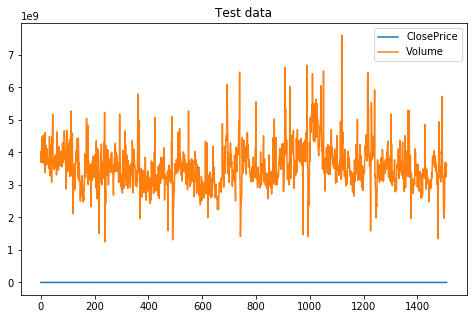

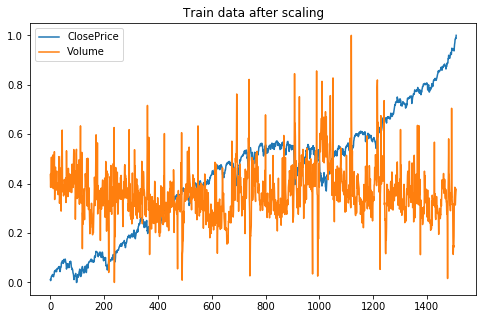

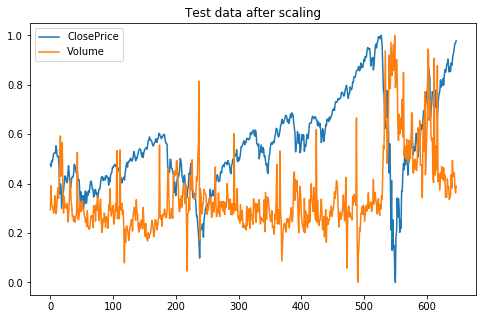

df_predictions (648, 5)
R^2 score on test data: 0.9591165413361136
            Date  sp500ClosePrice      Volume       target  predictions
1510  2018-01-12      2786.239990  3573970000  2776.419922  2782.340865
1511  2018-01-16      2776.419922  4325970000  2802.560059  2773.032325
1512  2018-01-17      2802.560059  3778050000  2798.030029  2798.690568
1513  2018-01-18      2798.030029  3681470000  2810.300049  2794.128148
1514  2018-01-19      2810.300049  3639430000  2832.969971  2806.302162
1515  2018-01-22      2832.969971  3471780000  2839.129883  2828.740258
1516  2018-01-23      2839.129883  3519650000  2837.540039  2834.893711
1517  2018-01-24      2837.540039  4014070000  2839.250000  2833.612194
1518  2018-01-25      2839.250000  3835150000  2872.870117  2835.204052
1519  2018-01-26      2872.870117  3443230000  2853.530029  2868.393656
            Date  sp500ClosePrice      Volume       target  predictions
2148  2020-07-28      3218.439941  4027890000  3258.439941  3212.3298

In [110]:
# predictions for "Tesla" with alpha = 0.5
stockname = "sp500"
predictions_stock(stockPrice,stockVol,stockname,alpha=0.5)

sp500 

X (2158, 2) y (2158, 1)
X_train (1510, 2) X_test (648, 2)
y_train (1510, 1) y_test (648, 1)


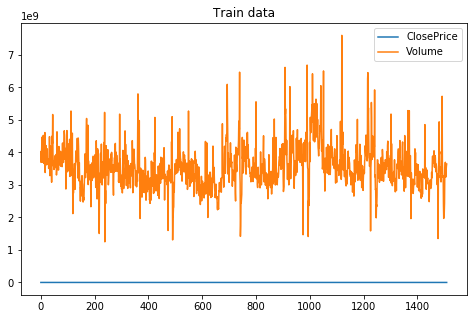

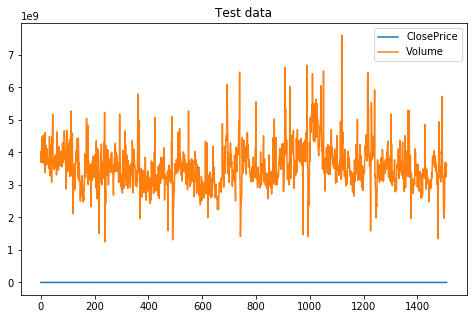

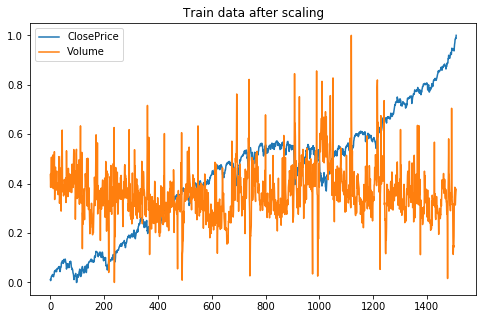

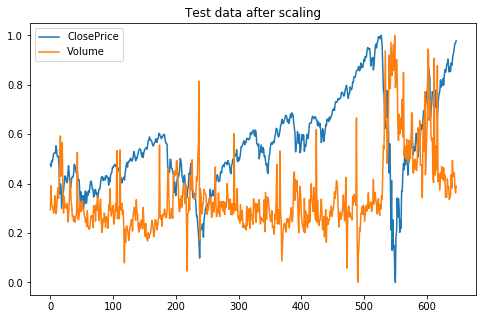

df_predictions (648, 5)
R^2 score on test data: 0.8935722918094762
            Date  sp500ClosePrice      Volume       target  predictions
1510  2018-01-12      2786.239990  3573970000  2776.419922  2739.776482
1511  2018-01-16      2776.419922  4325970000  2802.560059  2729.867237
1512  2018-01-17      2802.560059  3778050000  2798.030029  2755.015476
1513  2018-01-18      2798.030029  3681470000  2810.300049  2750.819290
1514  2018-01-19      2810.300049  3639430000  2832.969971  2762.441801
1515  2018-01-22      2832.969971  3471780000  2839.129883  2783.991473
1516  2018-01-23      2839.129883  3519650000  2837.540039  2789.767995
1517  2018-01-24      2837.540039  4014070000  2839.250000  2787.848602
1518  2018-01-25      2839.250000  3835150000  2872.870117  2789.614656
1519  2018-01-26      2872.870117  3443230000  2853.530029  2821.694571
            Date  sp500ClosePrice      Volume       target  predictions
2148  2020-07-28      3218.439941  4027890000  3258.439941  3147.5326

In [111]:
# predictions for "Tesla" with alpha = 5
stockname = "sp500"
predictions_stock(stockPrice,stockVol,stockname,alpha=5)

sp500 

X (2158, 2) y (2158, 1)
X_train (1510, 2) X_test (648, 2)
y_train (1510, 1) y_test (648, 1)


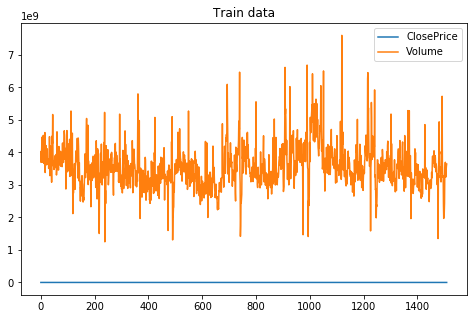

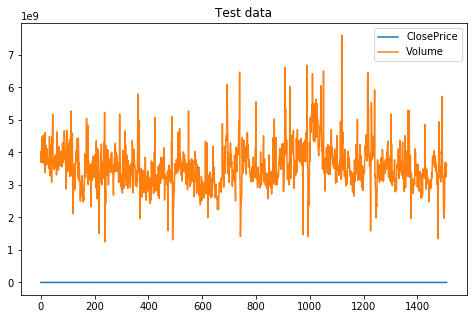

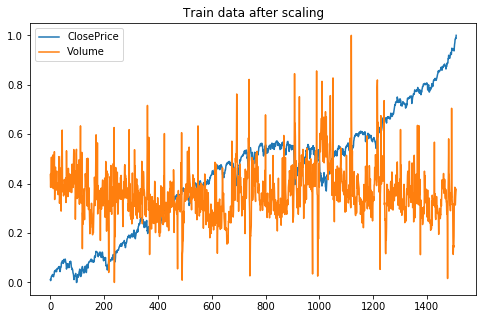

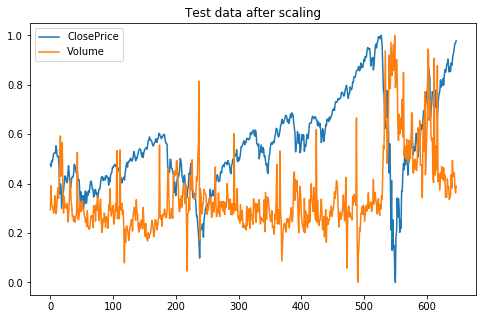

df_predictions (648, 5)
R^2 score on test data: 0.7990484994929639
            Date  sp500ClosePrice      Volume       target  predictions
1510  2018-01-12      2786.239990  3573970000  2776.419922  2713.730881
1511  2018-01-16      2776.419922  4325970000  2802.560059  2703.667572
1512  2018-01-17      2802.560059  3778050000  2798.030029  2728.348020
1513  2018-01-18      2798.030029  3681470000  2810.300049  2724.348558
1514  2018-01-19      2810.300049  3639430000  2832.969971  2735.621572
1515  2018-01-22      2832.969971  3471780000  2839.129883  2756.579853
1516  2018-01-23      2839.129883  3519650000  2837.540039  2762.139267
1517  2018-01-24      2837.540039  4014070000  2839.250000  2759.969895
1518  2018-01-25      2839.250000  3835150000  2872.870117  2761.791745
1519  2018-01-26      2872.870117  3443230000  2853.530029  2793.081135
            Date  sp500ClosePrice      Volume       target  predictions
2148  2020-07-28      3218.439941  4027890000  3258.439941  3108.0080

In [114]:
# predictions for "Tesla" with alpha = 8
stockname = "sp500"
predictions_stock(stockPrice,stockVol,stockname,alpha=8)